In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('seaborn')
%matplotlib inline

In [158]:
# Load the global temperature dataset and store it in a dataframe
orig_temp_data = pd.read_csv("C:\\Users\\TEMP\\Documents\\Python Scripts\\ASRI\\input\\astronomy\\Sunspots.csv")
df = orig_temp_data.copy()

df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [148]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3265 non-null   int64  
 1   Date                               3265 non-null   object 
 2   Monthly Mean Total Sunspot Number  3265 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.6+ KB


In [159]:
#a little cleaning to make eda easier

#rename columns
df.rename({'Unnamed: 0': 'id', 'Date': 'date'}, axis=1, inplace=True)
df.rename(columns={'Monthly Mean Total Sunspot Number': 'monthly_sunspot_avg'}, inplace=True)
#change column type from object to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   3265 non-null   int64         
 1   date                 3265 non-null   datetime64[ns]
 2   monthly_sunspot_avg  3265 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 76.6 KB


In [150]:
# percent of nulls in each column
df.isnull().sum() / df.shape[0] * 100

id                     0.0
date                   0.0
monthly_sunspot_avg    0.0
dtype: float64

In [151]:
###### count, mean, standard dev, quartiles, min and max
df.describe()

,id,monthly_sunspot_avg
count,3265.000000,3265.000000
mean,1632.000000,81.778775
std,942.668641,67.889277
min,0.000000,0.000000
25%,816.000000,23.900000
50%,1632.000000,67.200000
75%,2448.000000,122.500000
max,3264.000000,398.200000


In [152]:
df.iloc[df['monthly_sunspot_avg'].idxmin()]

id                                      60
date                   1754-01-31 00:00:00
monthly_sunspot_avg                    0.0
Name: 60, dtype: object

In [153]:
df.iloc[df['monthly_sunspot_avg'].idxmax()]

id                                     352
date                   1778-05-31 00:00:00
monthly_sunspot_avg                  398.2
Name: 352, dtype: object

(array([-91311., -76701., -62091., -47482., -32872., -18263.,  -3653.,
         10957.,  25567.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

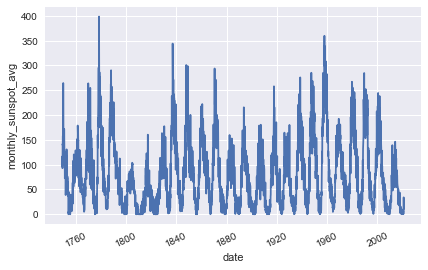

In [154]:
sns.lineplot(x = "date", y = "monthly_sunspot_avg",
             data = df)
plt.xticks(rotation = 25)

In [160]:
#add some useful variables by breaking out month and decade year
df['month']=df.dt.dt.month
df['decade_year'] =[int(str(i)[3]) for i in (df.date.dt.year)]
df['decade_year'].replace(0,10,inplace=True)
df.head()

,id,date,monthly_sunspot_avg,month,decade_year
0,0,1749-01-31,96.7,1,9
1,1,1749-02-28,104.3,2,9
2,2,1749-03-31,116.7,3,9
3,3,1749-04-30,92.8,4,9
4,4,1749-05-31,141.7,5,9


In [161]:
#split the dataframe into two sets, up to 1900 and after
split_date = pd.datetime(1975,12,31)

df_old_dates = df.loc[df['date'] <= split_date]
df_new_dates = df.loc[df['date'] > split_date]

(array([    0.,  1826.,  3652.,  5479.,  7305.,  9131., 10957., 12784.,
        14610., 16436., 18262., 20089.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

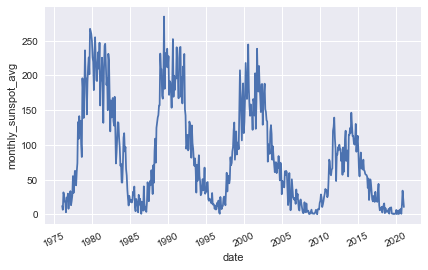

In [162]:
sns.lineplot(x = "date", y = "monthly_sunspot_avg",
             data = df_new_dates)
plt.xticks(rotation = 25)

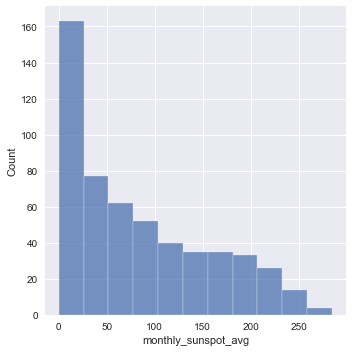

In [163]:
sns.displot(df_new_dates, x="monthly_sunspot_avg")

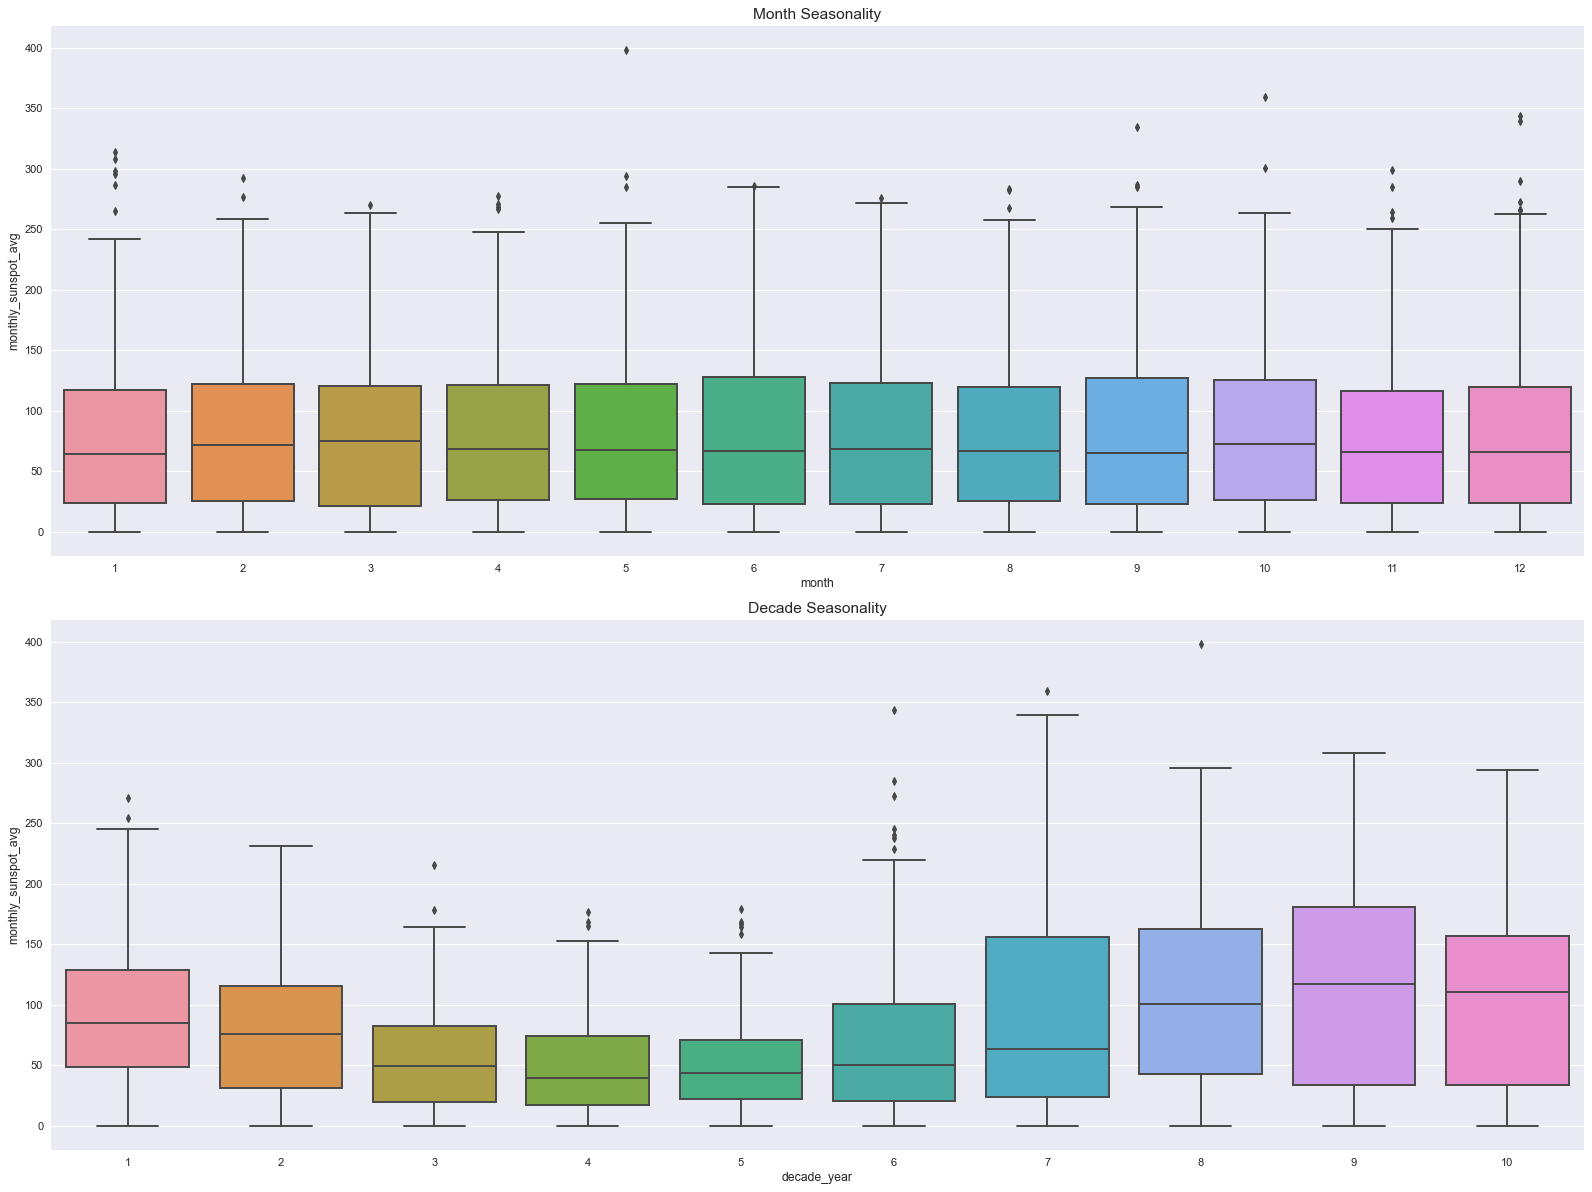

In [166]:
fig, axes = plt.subplots(2, 1, figsize=(20,15), dpi=80)
titles = ['Month Seasonality', 'Decade Seasonality']
cols = ['month', 'decade_year']

for col, axis, title in zip(cols, axes, titles):
    sns.boxplot(x=col, y='monthly_sunspot_avg', data=df, ax=axis)
    axis.set_title(title, fontsize=14)
    
fig.tight_layout()
plt.show()

In [167]:
!pip install pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html('report.html', open_browser=True)

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Shape of your Data Set loaded: (3265, 3)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    3 Predictors classified...
        2 variables removed since they were ID or low-information variables


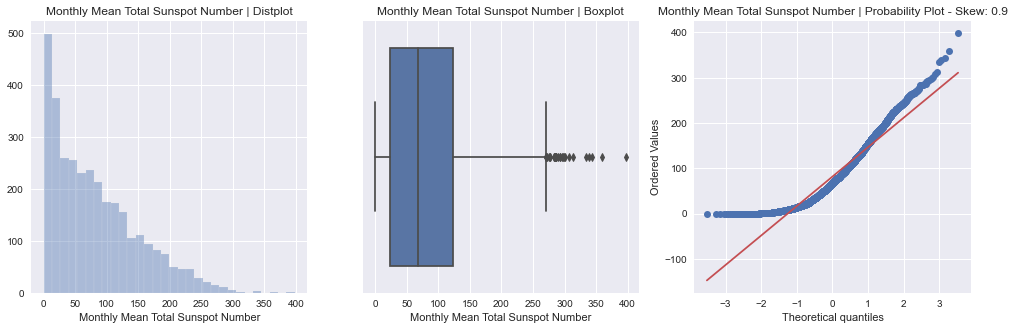

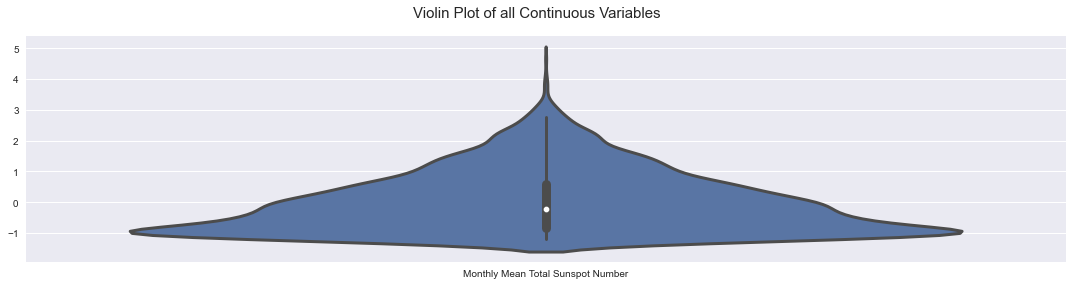

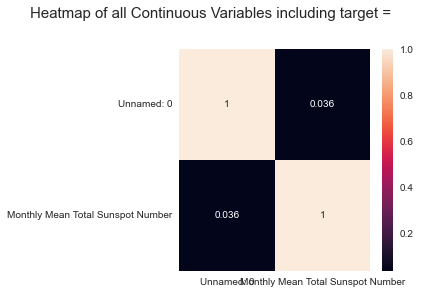

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz = 1 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [168]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_av = AV.AutoViz("C:\\Users\\TEMP\\Documents\\Python Scripts\\ASRI\\input\\astronomy\\Sunspots.csv")